Importando bibliotecas

In [ ]:
import pandas as pd        # Manipulação de dados
import numpy as np         # Operações numéricas e matrizes
import matplotlib.pyplot as plt  # Gráficos básicos
import seaborn as sns      # Visualizações estatísticas mais avançadas
from pandas import json_normalize # Normaliza dados JSON aninhados para DataFrame tabular
import requests  # Requisições web para obter dados de APIs

Obtenção e carregamento dos dados JSON diretamente do repositório GitHub

In [ ]:
# URL do arquivo JSON no GitHub (raw)
url_json = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/main/TelecomX_Data.json"

# Carregar os dados
try:
    response = requests.get(url_json)
    response.raise_for_status()  # Verifica erros na requisição
    dados = pd.DataFrame(response.json())  # Converte JSON para DataFrame
    print("✅ Dados carregados com sucesso!")
    print(f"Total de linhas: {len(dados)}")
except Exception as e:
    print(f"Erro ao carregar dados: {e}")

✅ Dados carregados com sucesso!
Total de linhas: 7267


Exploração inicial dos dados

In [ ]:
dados.columns

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

In [ ]:
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
dados.isnull().sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Desnormalização e união dos dados aninhados

In [ ]:
from pandas import json_normalize

# Normalizar a coluna 'customer'
df_customer = json_normalize(dados['customer'])
print("Dados 'customer' normalizados:")
print(df_customer.head())

# Normalizar a coluna 'phone'
df_phone = json_normalize(dados['phone'])
print("\nDados 'phone' normalizados:")
print(df_phone.head())

# Normalizar a coluna 'internet'
df_internet = json_normalize(dados['internet'])
print("\nDados 'internet' normalizados:")
print(df_internet.head())

# Normalizar a coluna 'account'
df_account = json_normalize(dados['account'])
print("\nDados 'account' normalizados:")
print(df_account.head())

# Agora vamos juntar todos os dados num único DataFrame
# Usando o índice original do DataFrame para alinhar as linhas
df_final = pd.concat([dados[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)

print("\nDataFrame final após concatenação:")
print(df_final.head())


Dados 'customer' normalizados:
   gender  SeniorCitizen Partner Dependents  tenure
0  Female              0     Yes        Yes       9
1    Male              0      No         No       9
2    Male              0      No         No       4
3    Male              1     Yes         No      13
4  Female              1     Yes         No       3

Dados 'phone' normalizados:
  PhoneService MultipleLines
0          Yes            No
1          Yes           Yes
2          Yes            No
3          Yes            No
4          Yes            No

Dados 'internet' normalizados:
  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No         Yes   
1             DSL             No           No               No          No   
2     Fiber optic             No           No              Yes          No   
3     Fiber optic             No          Yes              Yes          No   
4     Fiber optic             No

Análise Exploratória de Dados (EDA)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.198569
Yes    25.719004
        3.082427
Name: proportion, dtype: float64


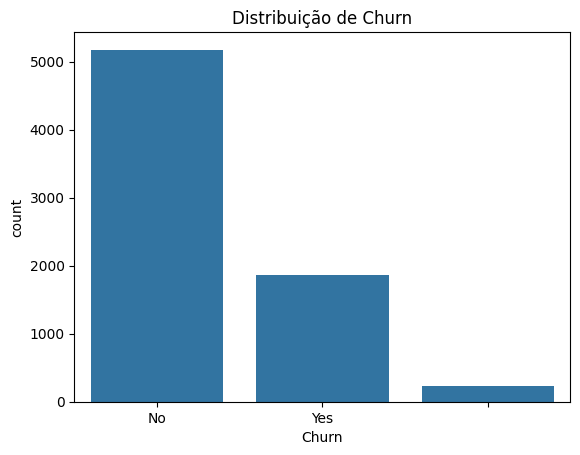

In [ ]:
print(df_final['Churn'].value_counts())
print(df_final['Churn'].value_counts(normalize=True) * 100)
sns.countplot(x='Churn', data=df_final)
plt.title("Distribuição de Churn")
plt.show()

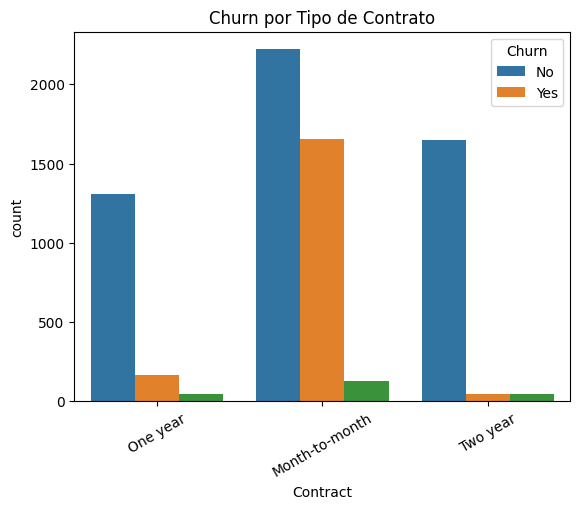

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df_final)
plt.title("Churn por Tipo de Contrato")
plt.xticks(rotation=30)
plt.show()

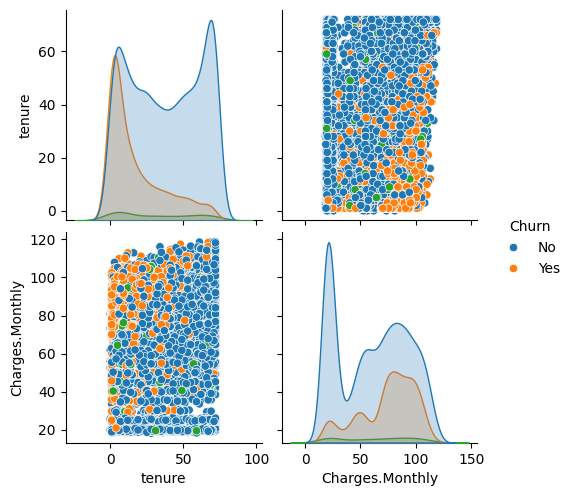

In [ ]:
num_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']
df_final[num_cols].describe()
sns.pairplot(df_final[num_cols + ['Churn']], hue='Churn')
plt.show()